In [10]:
# Assignment3
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import mixture
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
scalerStandard.fit(X)
X_scaled=scalerStandard.transform(X)
display(X_scaled.shape)
OrigX=X
X=X_scaled
display(Y.shape)

(1151, 19)

(1151, 19)

(1151,)

0.9805822899053813
[6.24700496e+00 4.86127443e+00 2.08438348e+00 1.15931240e+00
 1.02841633e+00 9.64905621e-01 8.12043976e-01 7.28160867e-01
 5.13521271e-01 2.48241107e-01 1.47234075e-01 1.09232450e-01
 4.47857339e-02 2.44350786e-02 1.97799411e-02 1.57049029e-02
 4.58996503e-03 2.29090345e-03 1.20425603e-03]
[3.28504079e-01 2.55634258e-01 1.09609082e-01 6.09634303e-02
 5.40801488e-02 5.07403843e-02 4.27020245e-02 3.82909597e-02
 2.70039536e-02 1.30539701e-02 7.74242932e-03 5.74408144e-03
 2.35509598e-03 1.28493943e-03 1.04014506e-03 8.25855700e-04
 2.41367222e-04 1.20469110e-04 6.33268296e-05]


(1151,)

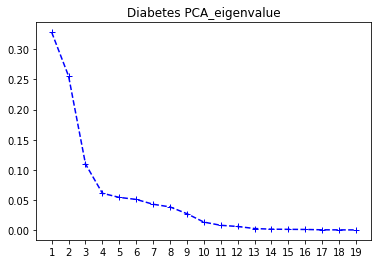

In [11]:
 
from sklearn.decomposition import PCA
 
pca = PCA(n_components=19)
pca.fit(X)
eg=pca.explained_variance_ratio_
varianceRatio=pca.explained_variance_ratio_
print(sum(varianceRatio[0:10]))
print(pca.explained_variance_ )
print(pca.explained_variance_ratio_)
plt.plot(range(1,20),eg,'--b+')
plt.xticks(range(1,20))
plt.title('Diabetes PCA_eigenvalue' )
display(Y.shape)


[0.630057803468208,
 0.6329479768786127,
 0.6329479768786127,
 0.5867052023121387,
 0.5578034682080925,
 0.5404624277456648,
 0.6098265895953757,
 0.6069364161849711,
 0.6098265895953757,
 0.6445086705202312,
 0.6271676300578035,
 0.6213872832369942,
 0.6184971098265896,
 0.615606936416185,
 0.630057803468208,
 0.6098265895953757,
 0.6127167630057804,
 0.6734104046242775,
 0.6734104046242775]

(1151,)

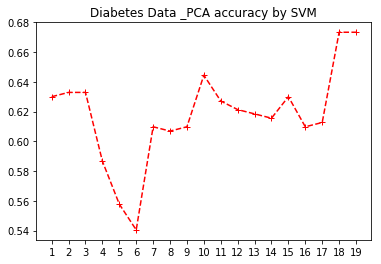

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
score=[]
for n_component in range(1,20):
        pca = PCA(n_components=n_component)
        pca.fit(X)
        X_PCA=pca.transform(X)
        X_testPCA=pca.transform(X_test_scaledStandard)
        X_trainPCA=pca.transform(X_train_scaledStandard)    
        clf =SVC(C=3000, gamma=0.1, kernel='rbf')
        clf.fit(X_trainPCA, Y_train)        
        score.append(clf.score(X_testPCA,Y_test))
        
display(score)
plt.plot(range(1,20),score,'--r+')
plt.xticks(range(1,20))
plt.title("Diabetes Data _PCA accuracy by SVM")
display(Y.shape)

In [13]:
        pca = PCA(n_components=10)
        pca.fit(X)
        X_PCA=pca.transform(X)

[0.29986485788942646,
 0.31224676711605154,
 0.29488492276294154,
 0.30318248904747674,
 0.22132646532762193,
 0.22265123567113151,
 0.24220872850379976,
 0.21429200585433766,
 0.20766310502233332,
 0.21139201207572225,
 0.18995966662694713,
 0.1862507497539706,
 0.19414408869456226,
 0.20478895990266224,
 0.18682569071764368,
 0.19543901558328572,
 0.1955950911693537,
 0.17844436229616403]

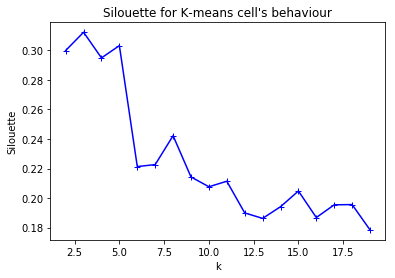

(1151,)

In [5]:

from sklearn.metrics import silhouette_score
s = []
for n_components in range(2,20):
    clusterer = KMeans(n_clusters=n_components,random_state=12,init='k-means++')
    clusterer.fit(X_PCA)
    labels = clusterer.predict(X_PCA)
    s.append(silhouette_score(X_PCA, labels, metric='euclidean'))
display(s)
plt.plot(range(2,20),s,'-b+')
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
plt.show()
display(Y.shape)

Automatically created module for IPython interactive environment
next


array([ 39903.53925806,  36446.85051401,  32611.50269473,  31616.34559692,
        30483.08376179,  30986.2317414 ,  29841.52360602,  29353.65284864,
        29233.26268298,  29121.52995235,  28867.4380487 ,  28349.26529556,
        28252.2025846 ,  27782.92171387,  27690.41384062,  27898.92499439,
        27389.69235292,  27431.41017133,  27195.3401888 ,  35071.96571023,
        34929.83081442,  33839.17396169,  33294.14336813,  33429.11000947,
        20857.19387358,  22528.52998266,  22134.86916531,   9914.72360647,
        17212.3282186 ,   6445.60008248,  15756.43657912,   8693.95153286,
         8327.73245847,   5723.51352645,   8679.00889141,   5203.55408225,
         4200.65943436,   4273.29166259,  34754.78832184,  27860.67741719,
        26425.35926735,  25464.42361035,  24349.18408499,  23831.58437293,
        23743.45911282,  22082.73296909,  23150.00095229,  21842.9157229 ,
        21842.11567445,  21609.082824  ,  21416.80385439,  21287.42110318,
        21509.77173903,  

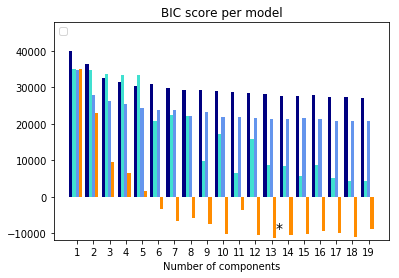

In [55]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_PCA)
        bic.append(gmm.bic(X_PCA))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot()
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()*1.2])
#plt.ylim(-40000,80000)

plt.legend( loc=2)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
#spl.legend([b[0] for b in bars], cv_types, bbox_to_anchor=(0., 1.02, 1., .102), loc=9,ncol=4, mode="expand", borderaxespad=0.)
#spl.legend([b[0] for b in bars], cv_types,ncol=2)
plt.title('BIC score per model')
print('next')
# Plot the winner
display(bic)

In [8]:
#

In [6]:
#

In [7]:
#

Homogeneity for 13 cluster: 0.081 
mutual index for 13 cluster: 0.026 
completnenss for 13 cluster: 0.029 


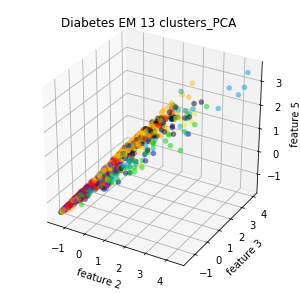

In [14]:
fig = plt.figure(figsize=(5, 5))
ax2=fig.add_subplot(111,projection='3d')
gmm = mixture.GaussianMixture(n_components=13, covariance_type='full',random_state=0)
gmm.fit(X_PCA)
cluster_labels = gmm.predict(X_PCA)
colors = cm.spectral(cluster_labels.astype(float) / 13)
ax2.scatter(X[:, 2], X[:, 3],X[:,5],s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')  

 
ax2.set_xlabel('feature 2 ')
ax2.set_ylabel('feature 3')
ax2.set_zlabel('feature 5')
ax2.set_title('Diabetes EM 13 clusters_PCA ')
 
print("Homogeneity for 13 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 13 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for 13 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))

Homogeneity for 3 cluster: 0.017 
mutual index for 3 cluster: 0.015 
completnenss for3 cluster: 0.016 


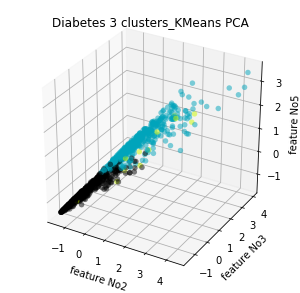

In [73]:
clusterer = KMeans(n_clusters=3,random_state=12,init='k-means++')
clusterer.fit(X_PCA)
cluster_labels = clusterer.predict(X_PCA)
colors = cm.spectral(cluster_labels.astype(float) /3)
fig = plt.figure(figsize=(5, 5))
ax1=fig.add_subplot(111,projection='3d') 
ax1.scatter(X[:, 2], X[:, 3],X[:,5], s=30,lw=0, alpha=0.5,
                c=colors, edgecolor='K');
ax1.set_xlabel('feature No2 ')
ax1.set_ylabel('feature No3')
ax1.set_zlabel('feature No5')
ax1.set_title('Diabetes 3 clusters_KMeans PCA')
print("Homogeneity for 3 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 3 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for3 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))